<a href="https://colab.research.google.com/github/Albina75/Accenture----BTTAI-cornellTech-/blob/main/ML_model_to_predict_credit_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DO NOT DELETE


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/gdrive/MyDrive/Accenture #1 (NYC) - Guess the Credit Score (Team B)/dataset/train.csv')


test = pd.read_csv('/content/gdrive/MyDrive/Accenture #1 (NYC) - Guess the Credit Score (Team B)/dataset/test.csv')

<ipython-input-2-5978a04baaf8>:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/gdrive/MyDrive/Accenture #1 (NYC) - Guess the Credit Score (Team B)/dataset/train.csv')


In [ ]:
import math

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


#Visuals:

In [ ]:
print("Dataset Overview:")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nColumn Names:")
print(df.columns)

# Display the first few rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

# Display data types and non-null counts for each column
print("\nData Types and Non-Null Counts:")
print(df.info())

#Display the null count for each column
print("Count of Null Values for Each Column:")
print(df.isnull().sum())

Dataset Overview:
Number of rows: 100000
Number of columns: 28

Column Names:
Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

First 5 Rows of the Dataset:
       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-

Albina added heatmap for numerical column.

<ipython-input-7-1ff091329a4f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


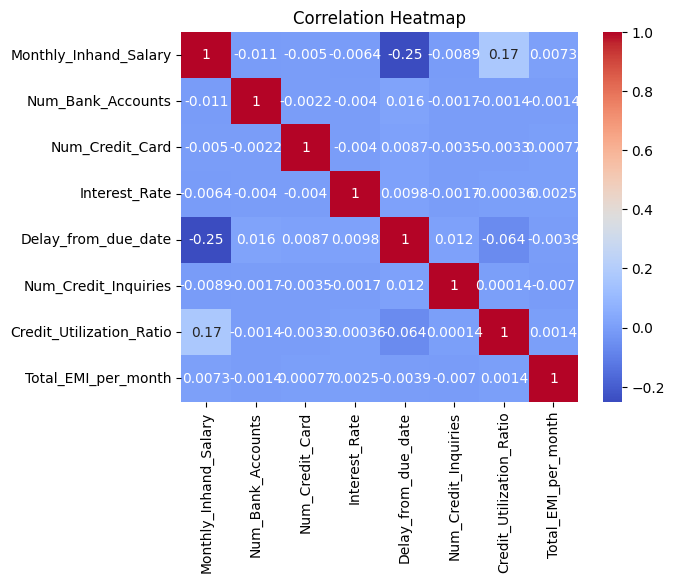

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Albina addded histogram for numerical columns.

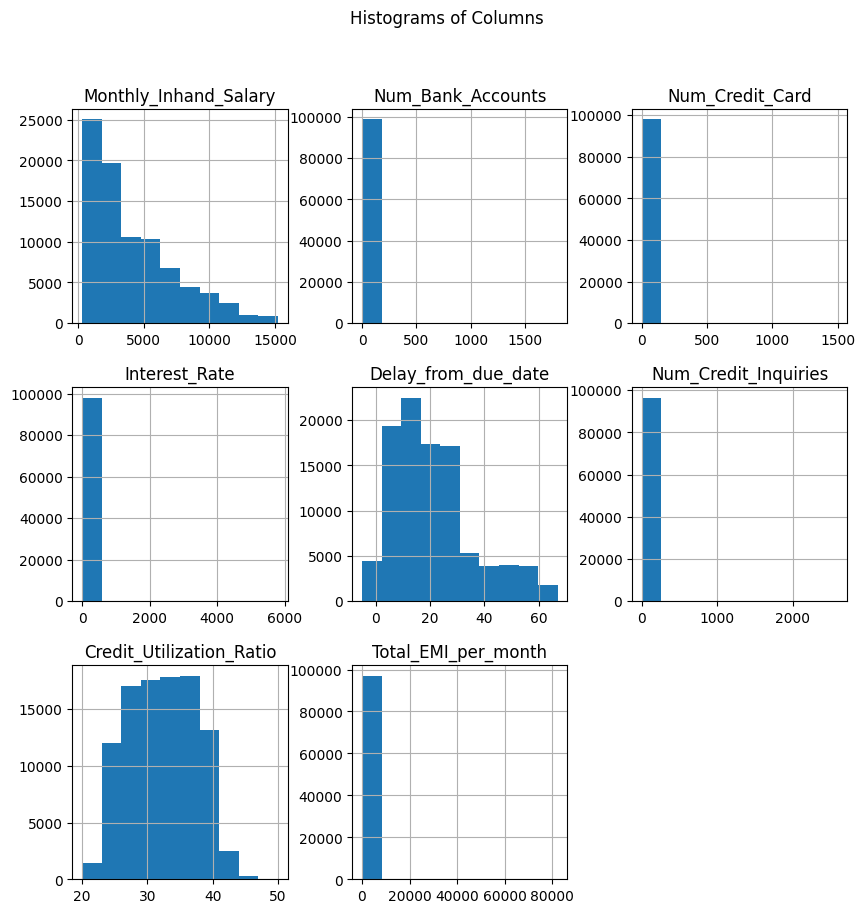

In [ ]:
df.hist(bins=10, figsize=(10, 10))
plt.suptitle('Histograms of Columns')
plt.show()

#Clean Code:

##Sojas Cleaned Code:

###Credit History Age Cleaned Code: 💳 💳 💳 💳 💳 💳 💳 💳 💳 💳 💳 💳




In [ ]:

# Replace non-numeric values with NaN
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors='coerce')

# Now you can safely convert the type because all non-numeric values are NaN
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].astype(float)

# Function to convert 'Credit_History_Age' from "X Years and Y Months" to "X.Y"
def convert_to_year_month(cha):
    if pd.notna(cha) and isinstance(cha, str):
        # Split the string into components
        parts = cha.split(' ')
        # Extract years and months as integers
        years = int(parts[0])
        months = int(parts[3]) / 12  # Convert months to a fraction of a year
        return round(years + months, 1)  # Return the sum as a float rounded to one decimal place
    else:
        return cha  # Return the original value if it's not a string


df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_year_month)

# Calculate the mode 'Credit_History_Age' value for each 'Customer_ID'
mode_cha_by_customer = df.groupby('Customer_ID')['Credit_History_Age'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index(name='Mode_CHA')

# Merge the mode dataframe with the original dataframe
df = df.merge(mode_cha_by_customer, on='Customer_ID', how='left')


df['Credit_History_Age'].fillna(df['Mode_CHA'], inplace=True)

df.drop(columns=['Mode_CHA'], inplace=True)

# Display the first few rows of the dataframe to verify the changes
df.head()
print(df.Changed_Credit_Limit.dtype)
df["Changed_Credit_Limit"]= df["Changed_Credit_Limit"].astype(float)



float64


###Age Clean Code:👶 🧑 🧓


In [ ]:
def clean_age(age):
    # Remove underscores and convert to NA
    age = age.replace('_', '')
    try:
        age = int(age)
        if age < 0 or age > 100:  # Assuming age is within typical range
            age = None
    except ValueError:
        age = None
    return age

# calls the clean_age function
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.apply(clean_age))

# Fills in NaN values with the mode of each 'Customer_ID' group
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA)).astype('Int64')


###SSN Clean Code:🤫

In [ ]:
# Define the cleaning function for 'SSN'
def clean_ssn(ssn):
    if ssn is not None:
        ssn = ''.join(filter(str.isdigit, str(ssn)))
        if len(ssn) == 9:
            return ssn[:3] + '-' + ssn[3:5] + '-' + ssn[5:]
    return None

# Apply the cleaning function to 'SSN' by 'Customer_ID' group
df['SSN'] = df.groupby('Customer_ID')['SSN'].transform(lambda x: x.apply(clean_ssn))

# Calculate the mode 'SSN' value for each 'Customer_ID'
mode_ssn_by_customer = df.groupby('Customer_ID')['SSN'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA).reset_index()

# Merge the mode values back into the DataFrame
df = df.merge(mode_ssn_by_customer, on='Customer_ID', suffixes=('', '_mode'))

# Fill missing (NaN) values in 'SSN' with the mode based on 'Customer_ID'
df['SSN'].fillna(df['SSN_mode'], inplace=True)

# Drop the mode columns
df.drop(columns=['SSN_mode'], inplace=True)

# The final cleaned and imputed 'SSN' column is in df['SSN']


SSN object --> int64

In [ ]:
# Remove hyphens and leading zeros, and convert SSN to int
df['SSN'] = df['SSN'].str.replace('-', '').astype(int)

# Display the DataFrame with 'SSN' as integers
print(df['SSN'])

0        821000265
1        821000265
2        821000265
3        821000265
4        821000265
           ...    
99995     78735990
99996     78735990
99997     78735990
99998     78735990
99999     78735990
Name: SSN, Length: 100000, dtype: int64


###Occupation Clean Code: 👷 💼 📆



In [ ]:

def clean_occupation(occupation):
    # Remove underscores and handle empty strings
    cleaned_occupation = occupation.replace('_', '').strip()
    if cleaned_occupation == "":
        return None
    else:
        return cleaned_occupation

# Apply the cleaning function to 'Occupation' within each 'Customer_ID' group
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.apply(clean_occupation))
# fills NaN with the mode
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA))


###Payment Behavior clean code




In [ ]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
# Define a function to remove the specific anomaly and replace it with the mode
def remove_specific_anomaly_and_replace_with_mode(group):

    # Replace the specific anomaly with null
    group['Payment_Behaviour'] = group['Payment_Behaviour'].replace('!@9#%8', pd.NA)

    # Replace the null values with the mode
    group['Payment_Behaviour'].fillna(group['Payment_Behaviour'].mode().iloc[0], inplace=True)

    return group

# Remove the specific anomaly and replace it with the mode
df = df.groupby('Customer_ID').apply(remove_specific_anomaly_and_replace_with_mode).reset_index(drop=True)

<ipython-input-15-c9752ddf6327>:13: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('Customer_ID').apply(remove_specific_anomaly_and_replace_with_mode).reset_index(drop=True)


In [ ]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

## Michelle's Cleaning Code

Num_of_Delayed_Payment and Outstanding_Debt cleanup

In [ ]:
def clean_and_convert(value):
    if isinstance(value, str):
        # Remove underscores and try to convert to numeric type
        cleaned_value = value.replace('_', '')
        try:
            numeric_value = float(cleaned_value)
            return numeric_value
        except ValueError:
            try:
                numeric_value = float(cleaned_value)
                return numeric_value
            except ValueError:
                return value
    elif isinstance(value, float):
        # Already a numeric value, return it
        return value
    else:
        # Non-numeric value, return it as is
        return value

In [ ]:
#Apply the clean and convert function to remove all underscores, convert all to floats. column should now be dtype float64
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(clean_and_convert)

#Fill in the blanks of the num_of_delayed_payment column with the average of the values associated with that specific customer
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.fillna(math.floor(x.mean())))

In [ ]:
print(df['Num_of_Delayed_Payment'].describe())

count    100000.000000
mean         30.862500
std         219.236737
min          -3.000000
25%           9.000000
50%          14.000000
75%          18.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64


In [ ]:
#Same for outstanding debt
df['Outstanding_Debt'] = df['Outstanding_Debt'].apply(clean_and_convert)

In [ ]:
print(df['Outstanding_Debt'].describe())

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64


Credit_Mix Cleaning

In [ ]:
# Replace underscores with NaN to make it easier
df['Credit_Mix'] = df['Credit_Mix'].replace('_', pd.NA)

# Fill NaN values with corresponding values based on 'Customer_ID'
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].transform('first')

In [ ]:
#Perform one-hot encoding to transform categorical into numerical data
df = pd.get_dummies(df, columns=['Credit_Mix'])

Credit Utilization Stats -> Seems like no need to cleanup

In [ ]:
print(df["Credit_Utilization_Ratio"].describe())

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64


## Umida's Cleaning Code

Type_of_Loan

In [ ]:
#Before
def clean_loan_types(row):
    if pd.isna(row) or not row.strip():
        return 'Empty Rows'
    elif row.lower() == 'not specified':
        return 'Not Specified'
    elif isinstance(row, str):

        # Split the row by commas and remove empty strings, leading/trailing spaces, and "and"
        loan_types = [loan.strip() for loan in row.split(',') if loan.strip()]
        # Remove duplicates and variations like "and ..."
        loan_types = list(set([loan if not loan.lower().startswith('and') else loan[4:].strip() for loan in loan_types]))
        # Sort the loan types alphabetically
        loan_types.sort()
        # Remove "empty" if it exists
        loan_types = [loan if loan.lower() != 'empty' else 'Empty Rows' for loan in loan_types]
        return ', '.join(loan_types)
    else:
        return 'Empty Rows'

# Apply the cleaning function to each row in the Type_of_Loan column and update the column in the DataFrame
df['Type_of_Loan'] = df['Type_of_Loan'].apply(clean_loan_types)
print("\nAfter Cleaning, before mapping:")
print(df['Type_of_Loan'].iloc[32:51])


After Cleaning, before mapping:
32                            Empty Rows
33                            Empty Rows
34                            Empty Rows
35                            Empty Rows
36                            Empty Rows
37                            Empty Rows
38                            Empty Rows
39                            Empty Rows
40                            Empty Rows
41                            Empty Rows
42                            Empty Rows
43                            Empty Rows
44                            Empty Rows
45                            Empty Rows
46                            Empty Rows
47                            Empty Rows
48    Credit-Builder Loan, Mortgage Loan
49    Credit-Builder Loan, Mortgage Loan
50    Credit-Builder Loan, Mortgage Loan
Name: Type_of_Loan, dtype: object


In [ ]:
#After
# Define a mapping dictionary to map loan types to integer codes
loan_type_mapping = {
    "Empty Rows": 0,
    "Not Specified": 1,
    "Auto Loan": 2,
    "Credit-Builder Loan": 3,
    "Home Equity Loan": 4,
    "Personal Loan": 5,
    "Mortgage Loan": 6,
    "Student Loan": 7,
    "Debt Consolidation Loan": 8,
    "Payday Loan": 9,
}

# Function to map multiple loan types to a list of corresponding integers
def map_loan_types_to_integers(row):
    if pd.isna(row) or row == 'NaN':
        return 'NaN'
    elif isinstance(row, str):
        loan_types = [loan_type_mapping[loan.strip()] for loan in row.split(', ')]
        return ', '.join(map(str, loan_types))
    else:
        return 'Empty Rows'

# Apply the mapping function to each row in the Type_of_Loan column
df['Type_of_Loan'] = df['Type_of_Loan'].apply(map_loan_types_to_integers)

# Convert the 'Type_of_Loan' column to float
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: float(x) if isinstance(x, (int, float)) else x)

# Display the DataFrame with float codes
print('\nAfter cleaning, after mapping:')
print(df['Type_of_Loan'].iloc[31:51])


After cleaning, after mapping:
31       1
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48    3, 6
49    3, 6
50    3, 6
Name: Type_of_Loan, dtype: object


In [ ]:

# # Function to clean and flatten loan types
# def clean_and_flatten_loan_types(row):
#     if pd.isna(row) or not row.strip():
#         return []
#     elif row.lower() == 'not specified':
#         return [loan_type_mapping["Not Specified"]]
#     elif isinstance(row, str):
#       try:
#         loan_types = [loan_type_mapping[loan.strip()] for loan in row.split(',')]
#         return loan_types
#       except KeyError:
#         print(row)
#     else:
#         return []

# # Apply the cleaning and flattening function to each row in the Type_of_Loan column
# df['Type_of_Loan'] = df['Type_of_Loan'].apply(clean_and_flatten_loan_types)
# df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: ', '.join(map(str, x)))

# # Display the DataFrame with flattened values
# print('\nAfter cleaning, after mapping:')
# print(df['Type_of_Loan'].iloc[30:51])


Num_of_Loan

In [ ]:
# Convert 'Num_of_Loan' to string and then remove special characters
df['Num_of_Loan'] = df['Num_of_Loan'].astype(str).str.replace(r'[^0-9.]', '', regex=True)

# Convert 'Num_of_Loan' to numeric, handling errors as 'coerce' (invalid parsing will be set as NaN)
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')

# Fill missing values with a specific value (e.g., -1)
df['Num_of_Loan'].fillna(-1, inplace=True)

# Convert negative numbers to -1
df.loc[df['Num_of_Loan'] < 0, 'Num_of_Loan'] = -1

# Calculate mean and median
mean_num_of_loan = df['Num_of_Loan'].mean()
median_num_of_loan = df['Num_of_Loan'].median()

print("Mean of Num_of_Loan:", mean_num_of_loan)
print("Median of Num_of_Loan:", median_num_of_loan)

Mean of Num_of_Loan: 10.76196
Median of Num_of_Loan: 3.0


Num_Credit_Card

In [ ]:
# Display the original statistics
print('Original Statistics:')
print(df['Num_Credit_Card'].describe())

# Convert 'Num_Credit_Card' to string and then remove special characters
df['Num_Credit_Card'] = df['Num_Credit_Card'].astype(str).str.replace(r'\D', '', regex=True)

# Convert 'Num_Credit_Card' to numeric, handling errors as 'coerce' (invalid parsing will be set as NaN)
df['Num_Credit_Card'] = pd.to_numeric(df['Num_Credit_Card'], errors='coerce')

# Fill missing values with mean
df['Num_Credit_Card'].fillna(df['Num_Credit_Card'].mean(), inplace=True)

# Define a threshold for outliers (e.g., 15, adjust as needed)
threshold = 15

# Turn outliers into -1
df.loc[df['Num_Credit_Card'] > threshold, 'Num_Credit_Card'] = -1

# Display the statistics after cleaning
print('\nStatistics after cleaning:')
print(df['Num_Credit_Card'].describe())

# Calculate mean and median
mean_num_credit_card = df['Num_Credit_Card'].mean()
median_num_credit_card = df['Num_Credit_Card'].median()

# Display mean and median
print('\nMean Num_Credit_Card:', mean_num_credit_card)
print('Median Num_Credit_Card:', median_num_credit_card)



Original Statistics:
count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

Statistics after cleaning:
count    100000.000000
mean          5.385430
std           2.264333
min          -1.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          15.000000
Name: Num_Credit_Card, dtype: float64

Mean Num_Credit_Card: 5.38543
Median Num_Credit_Card: 5.0


Num_Bank_Accounts

In [ ]:
# Display the original statistics
print('Original Statistics:')
print(df['Num_Bank_Accounts'].describe())

# Convert 'Num_Bank_Accounts' to string and then remove special characters
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype(str).str.replace(r'\D', '', regex=True)

# Convert 'Num_Bank_Accounts' to numeric, handling errors as 'coerce' (invalid parsing will be set as NaN)
df['Num_Bank_Accounts'] = pd.to_numeric(df['Num_Bank_Accounts'], errors='coerce')

# Fill missing values with a specific method (e.g., mean, median, or any other method)
# Let's use mean for this example
df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts'].mean(), inplace=True)

# Define a threshold for outliers (e.g., 50, adjust as needed)
threshold_bank_accounts = 50

# Turn outliers into -1
df.loc[df['Num_Bank_Accounts'] > threshold_bank_accounts, 'Num_Bank_Accounts'] = -1

# Display the statistics after cleaning
print('\nStatistics after cleaning:')
print(df['Num_Bank_Accounts'].describe())

# Calculate mean and median
mean_num_bank_accounts = df['Num_Bank_Accounts'].mean()
median_num_bank_accounts = df['Num_Bank_Accounts'].median()

# Display mean and median
print('\nMean Num_Bank_Accounts:', mean_num_bank_accounts)
print('Median Num_Bank_Accounts:', median_num_bank_accounts)


Original Statistics:
count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

Statistics after cleaning:
count    100000.000000
mean          5.297270
std           2.737622
min          -1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          50.000000
Name: Num_Bank_Accounts, dtype: float64

Mean Num_Bank_Accounts: 5.29727
Median Num_Bank_Accounts: 5.0


Interest_Rate

In [ ]:
# Display the original statistics
print('Original Statistics:')
print(df['Interest_Rate'].describe())

# Convert 'Interest_Rate' to string and then remove special characters
df['Interest_Rate'] = df['Interest_Rate'].astype(str).str.replace(r'\D', '', regex=True)

# Convert 'Interest_Rate' to numeric, handling errors as 'coerce' (invalid parsing will be set as NaN)
df['Interest_Rate'] = pd.to_numeric(df['Interest_Rate'], errors='coerce')

# Fill missing values with a specific method (e.g., mean, median, or any other method)
# Let's use mean for this example
df['Interest_Rate'].fillna(df['Interest_Rate'].mean(), inplace=True)

# Define a threshold for outliers (e.g., 35.99, adjust as needed)
threshold_interest_rate = 35.99

# Turn outliers into -1
df.loc[df['Interest_Rate'] > threshold_interest_rate, 'Interest_Rate'] = -1

# Display the statistics after cleaning
print('\nStatistics after cleaning:')
print(df['Interest_Rate'].describe())

# Calculate mean and median
mean_interest_rate = df['Interest_Rate'].mean()
median_interest_rate = df['Interest_Rate'].median()

# Display mean and median
print('\nMean Interest_Rate:', mean_interest_rate)
print('Median Interest_Rate:', median_interest_rate)


Original Statistics:
count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

Statistics after cleaning:
count    100000.000000
mean         14.215690
std           8.923924
min          -1.000000
25%           7.000000
50%          13.000000
75%          20.000000
max          34.000000
Name: Interest_Rate, dtype: float64

Mean Interest_Rate: 14.21569
Median Interest_Rate: 13.0


## Analizing the  Monthly_Inhand_Salary 💵, the Changed_Credit_Limit💳 and the Annual Income

In [ ]:
## this seems to just be visualizing, so i think we can comment it out for now

'''
print(df["Monthly_Inhand_Salary"].describe())
print("\n")

print("Let's see  a quick summary of the null values in the inhand Salary column ")
print(df.isnull().sum())


print("\n Let's try to see if there is any corrolation wwith some of the columns with the inhand salary")
plt.scatter(x=df['Monthly_Inhand_Salary'], y=df['Num_Credit_Card'],s=5)
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Monthly Inhand Salary')
plt.title('Relationship between Monthly Inhand Salary and Number of Bank Accounts')
plt.show()

print("\n")
plt.scatter(x=df['Monthly_Inhand_Salary'], y=df['Num_Credit_Card'],s=5)
plt.title('Relationship between Number of Bank Accounts and Monthly inhand Salary')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Monthly Inhand Salary')
plt.show()

print("\n")
df.plot(kind='hist', x='Num_Bank_Accounts', y='Monthly_Inhand_Salary', bins=25)
'''

'\nprint(df["Monthly_Inhand_Salary"].describe())\nprint("\n")\n\nprint("Let\'s see  a quick summary of the null values in the inhand Salary column ")\nprint(df.isnull().sum())\n\n\nprint("\n Let\'s try to see if there is any corrolation wwith some of the columns with the inhand salary")\nplt.scatter(x=df[\'Monthly_Inhand_Salary\'], y=df[\'Num_Credit_Card\'],s=5)\nplt.xlabel(\'Number of Bank Accounts\')\nplt.ylabel(\'Monthly Inhand Salary\')\nplt.title(\'Relationship between Monthly Inhand Salary and Number of Bank Accounts\')\nplt.show()\n\nprint("\n")\nplt.scatter(x=df[\'Monthly_Inhand_Salary\'], y=df[\'Num_Credit_Card\'],s=5)\nplt.title(\'Relationship between Number of Bank Accounts and Monthly inhand Salary\')\nplt.xlabel(\'Number of Bank Accounts\')\nplt.ylabel(\'Monthly Inhand Salary\')\nplt.show()\n\nprint("\n")\ndf.plot(kind=\'hist\', x=\'Num_Bank_Accounts\', y=\'Monthly_Inhand_Salary\', bins=25)\n'

In [ ]:
#We're going to replace the missing values of this column with the values of the rows above or below

df['Monthly_Inhand_Salary'].fillna(method='ffill', inplace=True)
df['Monthly_Inhand_Salary'].fillna(method='bfill', inplace=True)

#Now let's check to see if all the missing values have been delat with
print(f" The number of missing values is: {df['Monthly_Inhand_Salary'].isnull().sum()}")


# Calculate mean and median
mean_monthly_Inhand_salary = df['Monthly_Inhand_Salary'].mean()
median_monthly_Inhand_salary = df['Monthly_Inhand_Salary'].median()


print('\nMean Monthly_Inhand_Salary:',mean_monthly_Inhand_salary )
print('Median Monthly_Inhand_Salary:', median_monthly_Inhand_salary )
print(df.Monthly_Inhand_Salary.dtype)

 The number of missing values is: 0

Mean Monthly_Inhand_Salary: 4196.144245530076
Median Monthly_Inhand_Salary: 3089.5445833333333
float64


In [ ]:
# Credit card analyst
print(df["Changed_Credit_Limit"].describe())
print("\n")

#Let's see how many missing values represented by an underscore ("_") we have
specific = '_'
count = (df['Changed_Credit_Limit'] == specific).sum()
print('The number of missing values represented by an underscore is:', count)

# Let's replace the "_" values with -1 of the column
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', -1)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)


# Calculate mean and median
mean_ = df['Changed_Credit_Limit'].mean()
median_ = df['Changed_Credit_Limit'].median()


print('\nMean Changed_Credit_Limit:',mean_ )
print('Median Changed_Credit_Limit:', median_ )
print(df.Changed_Credit_Limit.dtype)


count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64


The number of missing values represented by an underscore is: 0

Mean Changed_Credit_Limit: 10.389025115157953
Median Changed_Credit_Limit: 9.4
float64


In [ ]:

# Handling missing values
missing_values = df['Annual_Income'].isnull().sum()
print(f"Before cleaning, we had {missing_values} missing values in the Annual Income column but some values have an underscore attached to them which is ruining the numerical values.")
print("\n")
# Removing underscores and converting to numerical format
df['Annual_Income'] = df['Annual_Income'].replace('_', '', regex=True)
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
'''
print("Let's vivisualize and check for outliers")
x= df["ID"]
Y= df["Annual_Income"]

plt.scatter(x, Y, label='Data Points', color='blue', marker='o')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')

# Show legend
plt.legend()

# Show the scatter plot
plt.show()

'''
print(df.Annual_Income.dtype)



Before cleaning, we had 0 missing values in the Annual Income column but some values have an underscore attached to them which is ruining the numerical values.


float64


# Change Credit Score into numerical values


In [ ]:
print(df["Credit_Score"].unique())

df['Credit_Score'] = df['Credit_Score'].apply(lambda x: 3 if x == 'Good' else x)
df['Credit_Score'] = df['Credit_Score'].apply(lambda x: 1 if x == 'Poor' else x)
df['Credit_Score'] = df['Credit_Score'].apply(lambda x: 2 if x == 'Standard' else x)


df.Credit_Score.dtype
df["Credit_Score"]= df["Credit_Score"].astype(float)
print(df.Credit_Score.dtype)


['Good' 'Standard' 'Poor']
float64


# Payement of Minimum Amount

In [ ]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].apply(lambda x: -1 if x == 'NM' else x)
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].apply(lambda x: 1 if x == 'Yes' else x)
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].apply(lambda x: 0 if x == 'No' else x)
df["Payment_of_Min_Amount"].unique()
df['Payment_of_Min_Amount'] = pd.to_numeric(df['Payment_of_Min_Amount'])
print(df.Payment_of_Min_Amount.dtype)
df["Payment_of_Min_Amount"].unique()

int64


array([ 0, -1,  1])

#Albina's Cleaned code:

In [ ]:
df.Monthly_Balance=df.Monthly_Balance.fillna('0.0')
def take(x):
    s=''
    for i in str(x):
        if (i.isnumeric()) or (i=='.'):
            s=s+i
    return s
df.Monthly_Balance=df.Monthly_Balance.apply(take)
df.Monthly_Balance=df.Monthly_Balance.astype('float')
df.loc[df.Monthly_Balance>1700]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
5545,0x367f,CUS_0x9885,February,Paul Dayl,17,186499679,Developer,41086.400,3660.866667,3,...,11.5,1,145.544320,201.1429928919469,Low_spent_Medium_value_payments,3.333333e+26,2.0,0,0,1
26177,0xaf63,CUS_0x5a90,February,Scuffhamq,45,264531943,Engineer,29728.310,2551.359167,3,...,31.8,0,34.496445,198.6115126951797,Low_spent_Large_value_payments,3.333333e+26,3.0,0,1,0
29158,0xc0d8,CUS_0x288d,July,Selamk,55,970198342,Lawyer,30748.930,2572.410833,1,...,19.4,0,43.727774,79.07180674947499,High_spent_Small_value_payments,3.333333e+26,2.0,0,1,0
35570,0xe66c,CUS_0x85e9,March,Anna Driveri,45,288627562,Musician,20929.295,1704.107917,5,...,21.6,0,13798.000000,220.30455197823662,Low_spent_Small_value_payments,3.333333e+26,2.0,0,1,0
38622,0xf84c,CUS_0x2b77,July,Longstretho,21,6360111,Doctor,15167.620,1471.968333,4,...,27.2,-1,9.930809,128.87587207680795,Low_spent_Small_value_payments,3.333333e+26,2.0,0,1,0
60009,0x1759f,CUS_0xc06e,February,radenp,30,46725387,Journalist,92114.680,7811.223333,3,...,20.8,1,54.219664,NaN,High_spent_Large_value_payments,3.333333e+26,2.0,0,0,1
75251,0x1ceed,CUS_0x57f3,April,Kristen Haysq,29,577850830,Mechanic,60904.590,5080.382500,3,...,12.9,1,61.525140,394.8939566733383,Low_spent_Small_value_payments,3.333333e+26,2.0,0,0,1
82918,0x1fbd8,CUS_0x41bf,July,Doeringq,44,693647611,Journalist,61990.520,4900.876667,10,...,13.7,-1,355.143396,194.28348839148083,Low_spent_Small_value_payments,3.333333e+26,2.0,1,0,0
83255,0x1fdd1,CUS_0x2f7e,August,Sabina Zawadzkif,31,109482095,Doctor,126353.040,10635.420000,4,...,31.8,0,167.043910,549.7661392945339,Low_spent_Medium_value_payments,3.333333e+26,1.0,0,0,1


In [ ]:
df.Amount_invested_monthly.fillna(value='10000',inplace=True)
df.Amount_invested_monthly=df.Amount_invested_monthly.apply(take)
df.Amount_invested_monthly=df.Amount_invested_monthly.astype('float')
np.quantile(df.Amount_invested_monthly,0.911)
df.loc[df.Amount_invested_monthly>1452]
ssn=df.groupby('Customer_ID')['Amount_invested_monthly'].median().index
vals=df.groupby('Customer_ID')['Amount_invested_monthly'].median().values
for x,y in zip(ssn,vals):
    df.loc[(df.Customer_ID==x) & (df.Amount_invested_monthly>1452),'Amount_invested_monthly']=y

In [ ]:
ssn=df.groupby('Customer_ID')['Num_Credit_Inquiries'].median().index
vals=df.groupby('Customer_ID')['Num_Credit_Inquiries'].median().values
for x,y in zip(ssn,vals):
    df.loc[df.Customer_ID==x,'Num_Credit_Inquiries']=y
    df['Num_Credit_Inquiries'].fillna(0, inplace=True)

    df.Num_Credit_Inquiries=df.Num_Credit_Inquiries.astype('int')

#Models

In [ ]:
pd.set_option('display.max_columns', None)

df.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",3,7.0,11.27,4,809.98,26.822620,22.1,0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,3.0,0,1,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",-1,6.0,11.27,4,809.98,31.944960,22.1,0,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,3.0,0,1,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",3,7.0,NaN,4,809.98,28.609352,22.2,0,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3.0,0,1,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",5,4.0,6.27,4,809.98,31.377862,22.3,0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3.0,0,1,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",6,6.0,11.27,4,809.98,24.797347,22.4,0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3.0,0,1,0
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",8,4.0,9.27,4,809.98,27.262259,22.5,0,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,3.0,0,1,0
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",3,8.0,11.27,4,809.98,22.537593,22.6,0,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,3.0,0,1,0
7,0x1609,CUS_0xd40,August,NaN,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",3,6.0,11.27,4,809.98,23.933795,22.1,0,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,2.0,0,1,0
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,4,6,1,3,3,4.0,5.42,2,605.03,24.464031,26.6,0,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,2.0,0,1,0
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,4,6,1,3,7,1.0,7.42,2,605.03,38.550848,26.7,0,18.816215,40.391238,High_spent_Large_value_payments,484.591214,3.0,0,1,0


Random Forest

In [ ]:
'''
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


# Drop unnecessary columns
df = df.drop(['ID', 'Customer_ID','SSN', 'Name'], axis=1)

# Handle categorical variables using Label Encoding
# This is just a basic example
le = LabelEncoder()
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Type_of_Loan'] = le.fit_transform(df['Type_of_Loan'])
df['Payment_Behaviour'] = le.fit_transform(df['Payment_Behaviour'])

# Split the data into features (X) and target variable (y)
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
'''

"\n# Import necessary libraries\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import mean_squared_error, r2_score\nfrom sklearn.preprocessing import LabelEncoder\n\n\n# Drop unnecessary columns\ndf = df.drop(['ID', 'Customer_ID','SSN', 'Name'], axis=1)\n\n# Handle categorical variables using Label Encoding\n# This is just a basic example\nle = LabelEncoder()\ndf['Occupation'] = le.fit_transform(df['Occupation'])\ndf['Type_of_Loan'] = le.fit_transform(df['Type_of_Loan'])\ndf['Payment_Behaviour'] = le.fit_transform(df['Payment_Behaviour'])\n\n# Split the data into features (X) and target variable (y)\nX = df.drop('Credit_Score', axis=1)\ny = df['Credit_Score']\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Create a Random Forest Regressor model\nrf_model = RandomForestRegressor(n_estimato

#Plan to change the column types:

✅ ID                           object. ---> float64

✅ Customer_ID                  object. --> float64

✅ Month                        object--  int 1-12

✅ SSN                          object --> int64

Occupation                   object - ???


✅ Type_of_Loan                 object --> float64

✅ Cleaned_Type_of_Loan         object (deleted)

Credit_History_Age           object --- int

Payment_of_Min_Amount        object -> 0--NO,1--yes,2--NM(N/A)


Payment_Behaviour            object. --> int

      'Low_spent_Small_value_payments',   ---1
      'Low_spent_Medium_value_payments', ----2
       'Low_spent_Large_value_payments', ----3
        'High_spent_Small_value_payments',   ---- 4
       'High_spent_Medium_value_payments', ----5
       'High_spent_Large_value_payments' ----- 6



Credit_Score              object --> 1=bad, 2 =standard, 3=good

In [ ]:
# Mapping of month names to numeric values
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Apply the mapping to the 'Month' column
df['Month'] = df['Month'].map(month_mapping)

In [ ]:
df.head(15)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",3,7.0,11.27,4,809.98,26.822620,22.1,0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,3.0,0,1,0
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",-1,6.0,11.27,4,809.98,31.944960,22.1,0,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,3.0,0,1,0
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",3,7.0,NaN,4,809.98,28.609352,22.2,0,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3.0,0,1,0
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",5,4.0,6.27,4,809.98,31.377862,22.3,0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3.0,0,1,0
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",6,6.0,11.27,4,809.98,24.797347,22.4,0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3.0,0,1,0
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",8,4.0,9.27,4,809.98,27.262259,22.5,0,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,3.0,0,1,0
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",3,8.0,11.27,4,809.98,22.537593,22.6,0,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,3.0,0,1,0
7,0x1609,CUS_0xd40,8,NaN,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",3,6.0,11.27,4,809.98,23.933795,22.1,0,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,2.0,0,1,0
8,0x160e,CUS_0x21b1,1,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,4,6,1,3,3,4.0,5.42,2,605.03,24.464031,26.6,0,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,2.0,0,1,0
9,0x160f,CUS_0x21b1,2,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,4,6,1,3,7,1.0,7.42,2,605.03,38.550848,26.7,0,18.816215,40.391238,High_spent_Large_value_payments,484.591214,3.0,0,1,0


In [ ]:
# Convert Customer_ID column to decimal equivalent
df['Customer_ID'] = df['Customer_ID'].str.replace('CUS_0x', '').apply(lambda x: float(int(x, 16)))

In [ ]:
#UNNCESSARY, CAN DROP COLUMN
#Apply the same logic from Customer_ID column to the ID column
df['ID'] = df['ID'].str.replace('0x', '').apply(lambda x: float(int(x, 16)))

In [ ]:
df.head(15)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,5634.0,3392.0,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",3,7.0,11.27,4,809.98,26.822620,22.1,0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,3.0,0,1,0
1,5635.0,3392.0,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",-1,6.0,11.27,4,809.98,31.944960,22.1,0,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,3.0,0,1,0
2,5636.0,3392.0,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",3,7.0,NaN,4,809.98,28.609352,22.2,0,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3.0,0,1,0
3,5637.0,3392.0,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",5,4.0,6.27,4,809.98,31.377862,22.3,0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3.0,0,1,0
4,5638.0,3392.0,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",6,6.0,11.27,4,809.98,24.797347,22.4,0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3.0,0,1,0
5,5639.0,3392.0,6,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",8,4.0,9.27,4,809.98,27.262259,22.5,0,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,3.0,0,1,0
6,5640.0,3392.0,7,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",3,8.0,11.27,4,809.98,22.537593,22.6,0,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,3.0,0,1,0
7,5641.0,3392.0,8,NaN,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"2, 3, 4, 5",3,6.0,11.27,4,809.98,23.933795,22.1,0,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,2.0,0,1,0
8,5646.0,8625.0,1,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,4,6,1,3,3,4.0,5.42,2,605.03,24.464031,26.6,0,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,2.0,0,1,0
9,5647.0,8625.0,2,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,4,6,1,3,7,1.0,7.42,2,605.03,38.550848,26.7,0,18.816215,40.391238,High_spent_Large_value_payments,484.591214,3.0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  float64
 1   Customer_ID               100000 non-null  float64
 2   Month                     100000 non-null  int64  
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  Int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
# Mapping of month names to numeric values
behavior_mapping = {
  'Low_spent_Small_value_payments':1,
  'Low_spent_Medium_value_payments':2,
   'Low_spent_Large_value_payments':3,
    'High_spent_Small_value_payments': 4,
   'High_spent_Medium_value_payments':5,
   'High_spent_Large_value_payments': 6
}

# Apply the mapping to the 'Month' column
df['Payment_Behaviour'] = df['Payment_Behaviour'].map(behavior_mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  float64
 1   Customer_ID               100000 non-null  float64
 2   Month                     100000 non-null  int64  
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  Int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
df.Payment_of_Min_Amount

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: Payment_of_Min_Amount, Length: 100000, dtype: int64

Correlation

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlations with the 'Credit_Score' column
credit_score_correlations = correlation_matrix['Credit_Score']

# Print correlations
print("Correlation with Credit_Score:")
print(credit_score_correlations)

Correlation with Credit_Score:
ID                          0.005757
Customer_ID                 0.006337
Month                       0.016291
Age                         0.160350
SSN                         0.005825
Annual_Income               0.008015
Monthly_Inhand_Salary       0.203641
Num_Bank_Accounts          -0.362803
Num_Credit_Card            -0.361041
Interest_Rate              -0.465963
Num_of_Loan                -0.006802
Delay_from_due_date        -0.431591
Num_of_Delayed_Payment     -0.008618
Changed_Credit_Limit       -0.169564
Num_Credit_Inquiries       -0.441289
Outstanding_Debt           -0.386525
Credit_Utilization_Ratio    0.045793
Credit_History_Age          0.388759
Payment_of_Min_Amount      -0.278127
Total_EMI_per_month         0.004382
Amount_invested_monthly     0.105679
Payment_Behaviour           0.118477
Monthly_Balance             0.001570
Credit_Score                1.000000
Credit_Mix_Bad             -0.392631
Credit_Mix_Good             0.431274
Credit_

<ipython-input-52-cfafa29c106f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


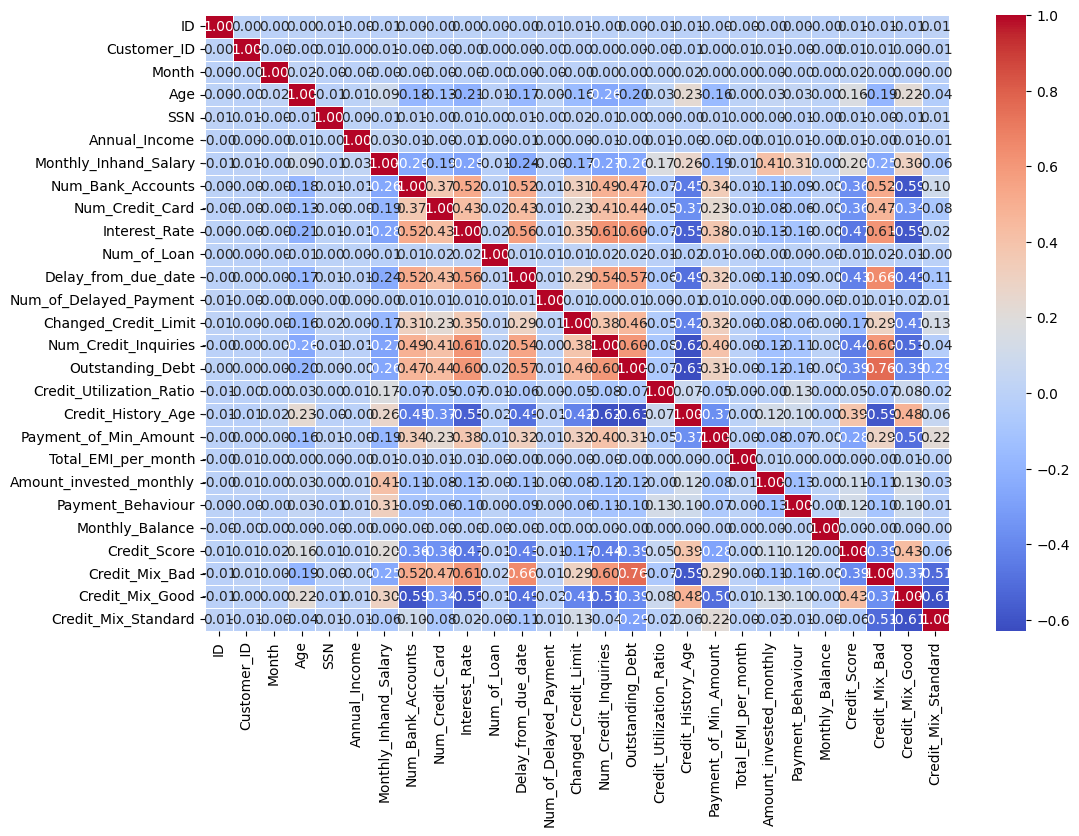

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Show the plot
plt.show()

<ipython-input-54-87f7dc5e06c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


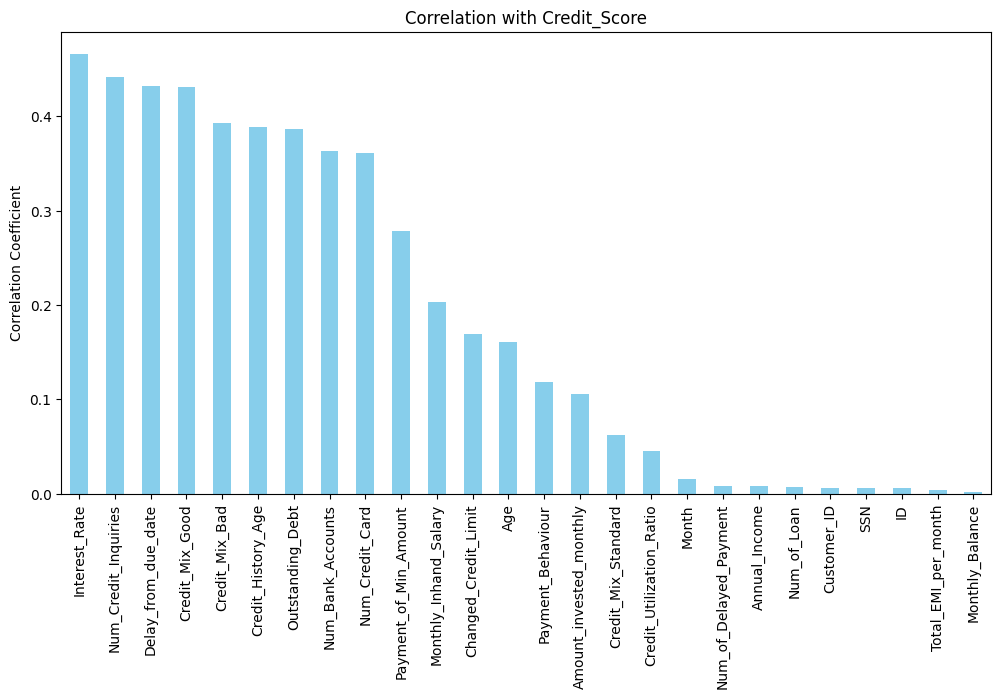

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlations with the 'Credit_Score' column
credit_score_correlations = correlation_matrix['Credit_Score']

# Sort correlations in descending order
sorted_correlations = credit_score_correlations.abs().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sorted_correlations.drop('Credit_Score').plot(kind='bar', color='skyblue')
plt.title('Correlation with Credit_Score')
plt.ylabel('Correlation Coefficient')
plt.show()

**MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

#**Random Forest**

In [ ]:
columns_to_drop = [
    'Credit_Score', 'Amount_invested_monthly', 'Credit_Mix_Standard',
    'Credit_Utilization_Ratio', 'Month', 'Num_of_Delayed_Payment',
    'Annual_Income', 'Num_of_Loan', 'Customer_ID', 'SSN', 'ID',
    'Total_EMI_per_month', 'Monthly_Balance', 'Name', 'Occupation', 'Payment_Behaviour', 'Type_of_Loan','Changed_Credit_Limit'
]



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


features = df.drop(columns=columns_to_drop, axis=1)  # Features (X)
target = df['Credit_Score']  # Target variable (y)


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42,min_samples_leaf=1,)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')




Accuracy: 0.8051


In [ ]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(rf_model, features, target, cv=5)

# Calculate the average and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f'Average CV Score: {mean_cv_score}')
print(f'Standard Deviation of CV Scores: {std_cv_score}')


Average CV Score: 0.6723100000000001
Standard Deviation of CV Scores: 0.007394011090064714


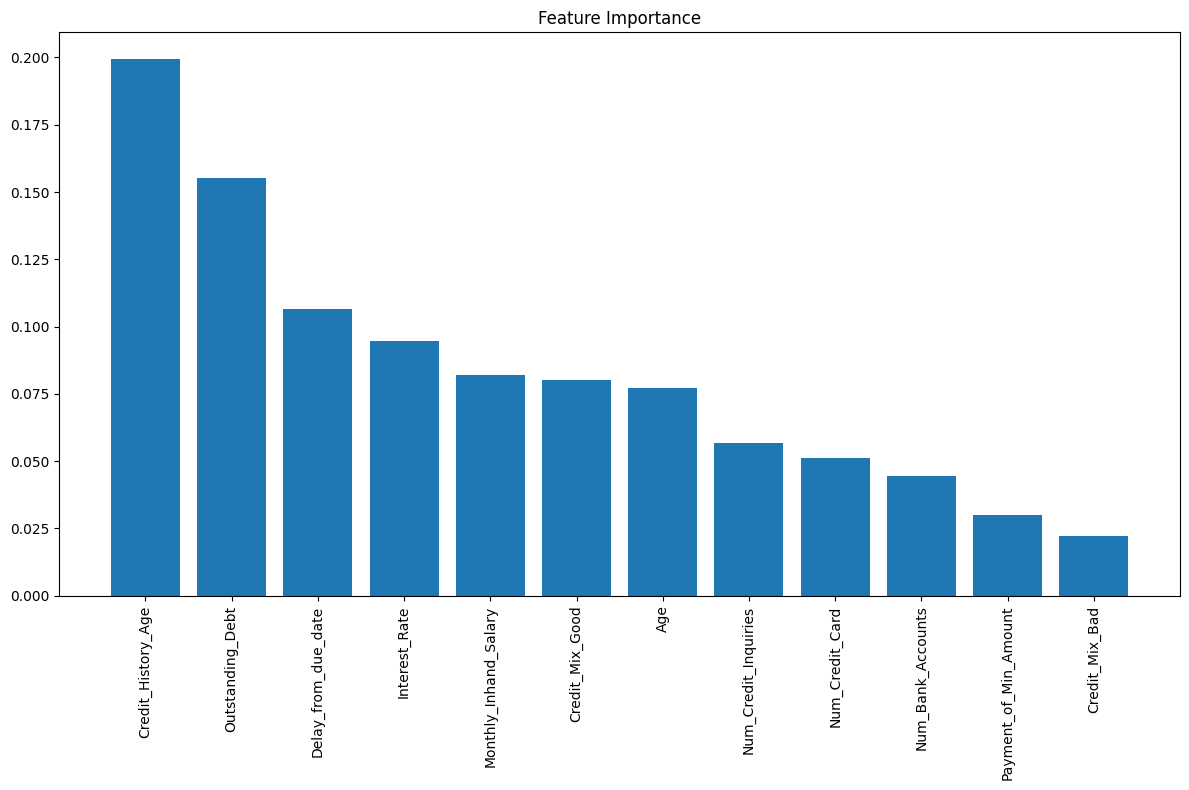

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming X_train, y_train are defined and features, target have been prepared

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Fit the model with training data

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import plot_tree

# Assuming rf_model is already trained with RandomForestClassifier
# Selecting one tree from the forest (for example, the first tree)
tree = rf_model.estimators_[0]

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features.columns, filled=True, rounded=True)
plt.show()


KeyboardInterrupt: ignored

# **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Initializing the Gradient Boosting model
gb_model = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Training the model
gb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
# Evaluating the model
print(f"Accuracy is {accuracy}")



Accuracy is 0.70345


# **K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Initializing the K-NN model

number = [1,2,3,4,5,6,7,8,9,10]

for i in number:
  knn_model = KNeighborsClassifier(n_neighbors=i)
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

  # Training the model
  knn_model.fit(X_train, y_train)

  # Making predictions on the test set
  y_pred = knn_model.predict(X_test)

  # Evaluating the model

  accuracy = accuracy_score(y_test,y_pred)
  print(f"Accuracy is {accuracy}")
  print("\n")



Accuracy is 0.7856


Accuracy is 0.78615


Accuracy is 0.79225


Accuracy is 0.7914


Accuracy is 0.79235


Accuracy is 0.7824


Accuracy is 0.7748


Accuracy is 0.7578


Accuracy is 0.74025


Accuracy is 0.71905




In [ ]:
df.info()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Split the data into features (X) and target variable (y)
X = df.drop(columns=columns_to_drop, axis=1)  # Features
y = df['Credit_Score']  # Target



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[4775 1071   28]
 [1196 8600  803]
 [   9  791 2727]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.80      0.81      0.81      5874
         2.0       0.82      0.81      0.82     10599
         3.0       0.77      0.77      0.77      3527

    accuracy                           0.81     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.81      0.81      0.81     20000


Accuracy Score:
0.8051


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the Gradient Boosting model
print("Gradient Boosting - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

print("\nGradient Boosting - Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("\nGradient Boosting - Accuracy Score:")
print(accuracy_score(y_test, y_pred_gb))

Gradient Boosting - Confusion Matrix:
[[3994 1485  395]
 [1599 7646 1354]
 [ 149  949 2429]]

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

         1.0       0.70      0.68      0.69      5874
         2.0       0.76      0.72      0.74     10599
         3.0       0.58      0.69      0.63      3527

    accuracy                           0.70     20000
   macro avg       0.68      0.70      0.69     20000
weighted avg       0.71      0.70      0.71     20000


Gradient Boosting - Accuracy Score:
0.70345


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Specify the number of neighbors (5 in this case)
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the K-NN model
print("K-Nearest Neighbors - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nK-Nearest Neighbors - Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nK-Nearest Neighbors - Accuracy Score:")
print(accuracy_score(y_test, y_pred_knn))

K-Nearest Neighbors - Confusion Matrix:
[[4891  970   13]
 [1404 8296  899]
 [  41  826 2660]]

K-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

         1.0       0.77      0.83      0.80      5874
         2.0       0.82      0.78      0.80     10599
         3.0       0.74      0.75      0.75      3527

    accuracy                           0.79     20000
   macro avg       0.78      0.79      0.78     20000
weighted avg       0.79      0.79      0.79     20000


K-Nearest Neighbors - Accuracy Score:
0.79235
